# 样本统计量的性质

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

%precision 3
%matplotlib inline

In [2]:
population = stats.norm(loc=4, scale=0.8)
population

In [7]:
# 多次计算样本均值

sample_mean_array = np.zeros(10000)
sample_std_array = np.zeros(10000)

np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size=10)
    sample_mean_array[i] = np.mean(sample)
    sample_std_array[i] = np.std(sample, ddof=1)

sample_mean_array

array([3.922, 3.864, 4.07 , ..., 4.136, 4.575, 4.099])

In [8]:
sample_std_array

array([1.004, 0.843, 0.655, ..., 0.843, 1.093, 0.92 ])

In [4]:
np.mean(sample_mean_array)

4.004

In [9]:
np.mean(sample_std_array)

0.777

<Axes: ylabel='Count'>

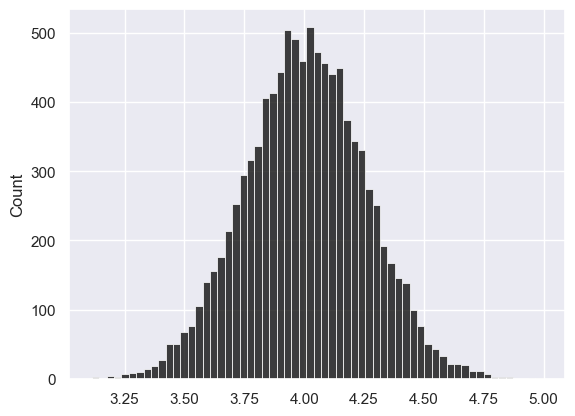

In [10]:
sns.histplot(sample_mean_array, color='black')

## 样本容量越大，样本均值越接近总体均值

In [11]:
size_array = np.arange(start=10, stop=100100, step=100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

Text(0, 0.5, 'sample mean')

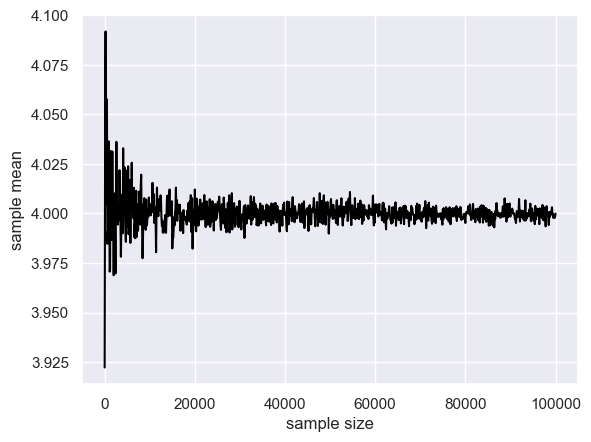

In [12]:
sample_mean_array_size = np.zeros(len(size_array))

np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size=size_array[i])
    sample_mean_array_size[i] = np.mean(sample)

plt.plot(size_array, sample_mean_array_size, color='black')
plt.xlabel("sample size")
plt.ylabel("sample mean")